In [117]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [118]:
flight_data = pd.read_csv('./dataset/merged_data/former_flight_data.csv')
flight_data['SCH_ARR_TIME'] = pd.to_datetime(flight_data['SCH_ARR_TIME'])
flight_data['SCH_DEP_TIME'] = pd.to_datetime(flight_data['SCH_DEP_TIME'])

flight_data['MONTH'] = flight_data['SCH_ARR_TIME'].dt.month
flight_data['DAY'] = flight_data['SCH_ARR_TIME'].dt.day
flight_data['DEP_MINUTES'] = flight_data['SCH_DEP_TIME'].dt.hour * 60 + flight_data['SCH_DEP_TIME'].dt.minute
flight_data['ARR_MINUTES'] = flight_data['SCH_ARR_TIME'].dt.hour * 60 + flight_data['SCH_ARR_TIME'].dt.minute

flight_data.drop(columns=['SCH_DEP_TIME', 'SCH_ARR_TIME'], inplace=True)

flight_data.head()

flight_data.dtypes

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,ARR_DELAY,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_precipprob,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,ORGIN_WTH_severerisk,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_precipprob,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DEST_WTH_severerisk,MONTH,DAY,DEP_MINUTES,ARR_MINUTES
0,1,AA,MQ,ORD,-19.00,14.10,0.00,0,0.00,7.80,226.00,0.00,9.90,3.00,17.80,0.00,0,0.00,6.90,309.00,84.30,9.90,3.00,1,3,625,796
1,1,AA,MQ,ORD,12.00,20.10,0.00,0,0.00,9.60,205.00,24.20,9.90,3.00,12.70,0.00,0,0.00,5.80,335.00,29.60,9.90,3.00,1,3,1045,1212
2,1,AA,MQ,ORD,-2.00,22.70,0.00,0,0.00,12.50,218.00,24.20,9.90,3.00,15.00,0.00,0,0.00,5.70,292.00,47.30,9.90,3.00,1,3,928,1095
3,1,UA,G7,ORD,-14.00,22.70,0.00,0,0.00,12.50,218.00,24.20,9.90,3.00,15.00,0.00,0,0.00,5.70,292.00,47.30,9.90,3.00,1,3,885,1056
4,1,B6,B6,JFK,39.00,24.70,0.00,0,0.00,9.60,345.00,7.20,9.90,3.00,11.70,0.00,0,0.00,0.00,0.00,94.70,8.80,3.00,1,3,1305,1379


DAY_OF_WEEK               int64
MKT_UNIQUE_CARRIER       object
OP_UNIQUE_CARRIER        object
ORIGIN                   object
ARR_DELAY               float64
ORGIN_WTH_temp          float64
ORGIN_WTH_precip        float64
ORGIN_WTH_precipprob      int64
ORGIN_WTH_snow          float64
ORGIN_WTH_windspeed     float64
ORGIN_WTH_winddir       float64
ORGIN_WTH_cloudcover    float64
ORGIN_WTH_visibility    float64
ORGIN_WTH_severerisk    float64
DEST_WTH_temp           float64
DEST_WTH_precip         float64
DEST_WTH_precipprob       int64
DEST_WTH_snow           float64
DEST_WTH_windspeed      float64
DEST_WTH_winddir        float64
DEST_WTH_cloudcover     float64
DEST_WTH_visibility     float64
DEST_WTH_severerisk     float64
MONTH                     int32
DAY                       int32
DEP_MINUTES               int32
ARR_MINUTES               int32
dtype: object

In [119]:
flight_data.dtypes

DAY_OF_WEEK               int64
MKT_UNIQUE_CARRIER       object
OP_UNIQUE_CARRIER        object
ORIGIN                   object
ARR_DELAY               float64
ORGIN_WTH_temp          float64
ORGIN_WTH_precip        float64
ORGIN_WTH_precipprob      int64
ORGIN_WTH_snow          float64
ORGIN_WTH_windspeed     float64
ORGIN_WTH_winddir       float64
ORGIN_WTH_cloudcover    float64
ORGIN_WTH_visibility    float64
ORGIN_WTH_severerisk    float64
DEST_WTH_temp           float64
DEST_WTH_precip         float64
DEST_WTH_precipprob       int64
DEST_WTH_snow           float64
DEST_WTH_windspeed      float64
DEST_WTH_winddir        float64
DEST_WTH_cloudcover     float64
DEST_WTH_visibility     float64
DEST_WTH_severerisk     float64
MONTH                     int32
DAY                       int32
DEP_MINUTES               int32
ARR_MINUTES               int32
dtype: object

In [120]:
flight_data.columns
flight_data.shape

Index(['DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip',
       'ORGIN_WTH_precipprob', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'ORGIN_WTH_severerisk', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_precipprob', 'DEST_WTH_snow', 'DEST_WTH_windspeed',
       'DEST_WTH_winddir', 'DEST_WTH_cloudcover', 'DEST_WTH_visibility',
       'DEST_WTH_severerisk', 'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES'],
      dtype='object')

(6773, 27)

In [121]:
flight_data.drop(columns = ['ORGIN_WTH_severerisk', 'DEST_WTH_severerisk'], inplace = True)

In [122]:
prediction_data = pd.read_csv('./test_data/Test_Merged_Data.csv')
prediction_data.head()
prediction_data.drop(columns = ['ORGIN_WTH_severerisk', 'DEST_WTH_severerisk'], inplace = True)

,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,SCH_DEP_TIME,SCH_ARR_TIME,DAY_OF_WEEK,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_precipprob,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,ORGIN_WTH_severerisk,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_precipprob,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DEST_WTH_severerisk
0,UA,UA,ORD,2024-04-19 18:52:00,2024-04-19 21:47:00,5,52.10,0.00,0.00,0,12.80,270.00,46.00,10.10,10,53.00,0.00,34.00,0,12.80,270.00,57.00,10.10,10
1,AA,MQ,ORD,2024-04-19 19:59:00,2024-04-19 22:52:00,5,49.90,0.00,0.00,0,12.80,270.00,48.00,10.10,10,52.10,0.00,26.00,0,11.40,270.00,48.00,10.10,10
2,B6,B6,JFK,2024-04-19 13:34:00,2024-04-19 14:51:00,5,54.10,0.00,9.00,0,12.80,150.00,37.00,10.10,10,60.00,0.01,74.00,0,21.90,190.00,85.00,10.10,10
3,DL,9E,JFK,2024-04-19 14:55:00,2024-04-19 16:21:00,5,53.00,0.00,9.00,0,11.40,150.00,51.00,10.10,10,60.00,0.01,75.00,0,21.90,190.00,80.00,6.90,10
4,B6,B6,MCO,2024-04-19 13:35:00,2024-04-19 16:25:00,5,89.00,0.00,3.00,0,5.80,270.00,20.00,10.10,10,60.00,0.01,75.00,0,21.90,190.00,80.00,6.90,10


In [123]:
prediction_data['SCH_ARR_TIME'] = pd.to_datetime(prediction_data['SCH_ARR_TIME'])
prediction_data['SCH_DEP_TIME'] = pd.to_datetime(prediction_data['SCH_DEP_TIME'])

prediction_data['MONTH'] = prediction_data['SCH_ARR_TIME'].dt.month
prediction_data['DAY'] = prediction_data['SCH_ARR_TIME'].dt.day
prediction_data['DEP_MINUTES'] = prediction_data['SCH_DEP_TIME'].dt.hour * 60 + prediction_data['SCH_DEP_TIME'].dt.minute
prediction_data['ARR_MINUTES'] = prediction_data['SCH_ARR_TIME'].dt.hour * 60 + prediction_data['SCH_ARR_TIME'].dt.minute

prediction_data.drop(columns=['SCH_DEP_TIME', 'SCH_ARR_TIME'], inplace=True)

prediction_data.head()

prediction_data.dtypes

,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,DAY_OF_WEEK,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_precipprob,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_precipprob,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,MONTH,DAY,DEP_MINUTES,ARR_MINUTES
0,UA,UA,ORD,5,52.10,0.00,0.00,0,12.80,270.00,46.00,10.10,53.00,0.00,34.00,0,12.80,270.00,57.00,10.10,4,19,1132,1307
1,AA,MQ,ORD,5,49.90,0.00,0.00,0,12.80,270.00,48.00,10.10,52.10,0.00,26.00,0,11.40,270.00,48.00,10.10,4,19,1199,1372
2,B6,B6,JFK,5,54.10,0.00,9.00,0,12.80,150.00,37.00,10.10,60.00,0.01,74.00,0,21.90,190.00,85.00,10.10,4,19,814,891
3,DL,9E,JFK,5,53.00,0.00,9.00,0,11.40,150.00,51.00,10.10,60.00,0.01,75.00,0,21.90,190.00,80.00,6.90,4,19,895,981
4,B6,B6,MCO,5,89.00,0.00,3.00,0,5.80,270.00,20.00,10.10,60.00,0.01,75.00,0,21.90,190.00,80.00,6.90,4,19,815,985


MKT_UNIQUE_CARRIER       object
OP_UNIQUE_CARRIER        object
ORIGIN                   object
DAY_OF_WEEK               int64
ORGIN_WTH_temp          float64
ORGIN_WTH_precip        float64
ORGIN_WTH_precipprob    float64
ORGIN_WTH_snow            int64
ORGIN_WTH_windspeed     float64
ORGIN_WTH_winddir       float64
ORGIN_WTH_cloudcover    float64
ORGIN_WTH_visibility    float64
DEST_WTH_temp           float64
DEST_WTH_precip         float64
DEST_WTH_precipprob     float64
DEST_WTH_snow             int64
DEST_WTH_windspeed      float64
DEST_WTH_winddir        float64
DEST_WTH_cloudcover     float64
DEST_WTH_visibility     float64
MONTH                     int32
DAY                       int32
DEP_MINUTES               int32
ARR_MINUTES               int32
dtype: object

In [124]:
flight_data.columns
flight_data.shape

Index(['DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip',
       'ORGIN_WTH_precipprob', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'DEST_WTH_temp', 'DEST_WTH_precip', 'DEST_WTH_precipprob',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES'],
      dtype='object')

(6773, 25)

In [126]:
flight_data_columns = set(flight_data.columns)
prediction_data_columns = set(prediction_data.columns)

missing_columns = flight_data_columns - prediction_data_columns

print(missing_columns)

{'ARR_DELAY'}


In [127]:
categorical_vars = {}
if True:
    for col in flight_data.columns:
        unique_col_vals = flight_data[col].unique()        
        if(len(unique_col_vals) < 12):            
            categorical_vars[col] = unique_col_vals
categorical_vars

{'DAY_OF_WEEK': array([1, 2, 3, 4, 5, 6, 7]),
 'MKT_UNIQUE_CARRIER': array(['AA', 'UA', 'B6', 'DL', 'WN'], dtype=object),
 'OP_UNIQUE_CARRIER': array(['MQ', 'G7', 'B6', '9E', 'OO', 'PT', 'WN', 'UA', 'YX', 'ZW'],
       dtype=object),
 'ORIGIN': array(['ORD', 'JFK', 'MCO'], dtype=object),
 'ORGIN_WTH_precipprob': array([  0, 100]),
 'DEST_WTH_precipprob': array([  0, 100])}

In [128]:
prediction_data['ORGIN_WTH_precipprob'] = prediction_data['ORGIN_WTH_precipprob'].apply(lambda x: 100 if x > 0 else 0)
prediction_data['DEST_WTH_precipprob'] = prediction_data['DEST_WTH_precipprob'].apply(lambda x: 100 if x > 0 else 0)

# Convert the datatype to int64
prediction_data['ORGIN_WTH_precipprob'] = prediction_data['ORGIN_WTH_precipprob'].astype('int64')
prediction_data['DEST_WTH_precipprob'] = prediction_data['DEST_WTH_precipprob'].astype('int64')

# Check the changes
print(prediction_data.dtypes)

MKT_UNIQUE_CARRIER       object
OP_UNIQUE_CARRIER        object
ORIGIN                   object
DAY_OF_WEEK               int64
ORGIN_WTH_temp          float64
ORGIN_WTH_precip        float64
ORGIN_WTH_precipprob      int64
ORGIN_WTH_snow            int64
ORGIN_WTH_windspeed     float64
ORGIN_WTH_winddir       float64
ORGIN_WTH_cloudcover    float64
ORGIN_WTH_visibility    float64
DEST_WTH_temp           float64
DEST_WTH_precip         float64
DEST_WTH_precipprob       int64
DEST_WTH_snow             int64
DEST_WTH_windspeed      float64
DEST_WTH_winddir        float64
DEST_WTH_cloudcover     float64
DEST_WTH_visibility     float64
MONTH                     int32
DAY                       int32
DEP_MINUTES               int32
ARR_MINUTES               int32
dtype: object


In [129]:
prediction_data.head()

,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,DAY_OF_WEEK,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_precipprob,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_precipprob,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,MONTH,DAY,DEP_MINUTES,ARR_MINUTES
0,UA,UA,ORD,5,52.10,0.00,0,0,12.80,270.00,46.00,10.10,53.00,0.00,100,0,12.80,270.00,57.00,10.10,4,19,1132,1307
1,AA,MQ,ORD,5,49.90,0.00,0,0,12.80,270.00,48.00,10.10,52.10,0.00,100,0,11.40,270.00,48.00,10.10,4,19,1199,1372
2,B6,B6,JFK,5,54.10,0.00,100,0,12.80,150.00,37.00,10.10,60.00,0.01,100,0,21.90,190.00,85.00,10.10,4,19,814,891
3,DL,9E,JFK,5,53.00,0.00,100,0,11.40,150.00,51.00,10.10,60.00,0.01,100,0,21.90,190.00,80.00,6.90,4,19,895,981
4,B6,B6,MCO,5,89.00,0.00,100,0,5.80,270.00,20.00,10.10,60.00,0.01,100,0,21.90,190.00,80.00,6.90,4,19,815,985


In [130]:
flight_data.columns
prediction_data.columns

Index(['DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip',
       'ORGIN_WTH_precipprob', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'DEST_WTH_temp', 'DEST_WTH_precip', 'DEST_WTH_precipprob',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES'],
      dtype='object')

Index(['MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DAY_OF_WEEK',
       'ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_precipprob',
       'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir',
       'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility', 'DEST_WTH_temp',
       'DEST_WTH_precip', 'DEST_WTH_precipprob', 'DEST_WTH_snow',
       'DEST_WTH_windspeed', 'DEST_WTH_winddir', 'DEST_WTH_cloudcover',
       'DEST_WTH_visibility', 'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES'],
      dtype='object')

In [131]:
acategorical_vars = {}
if True:
    for acol in prediction_data.columns:
        aunique_col_vals = prediction_data[acol].unique()        
        if(len(aunique_col_vals) < 12):            
            acategorical_vars[acol] = aunique_col_vals
acategorical_vars

{'MKT_UNIQUE_CARRIER': array(['UA', 'AA', 'B6', 'DL', 'WN'], dtype=object),
 'OP_UNIQUE_CARRIER': array(['UA', 'MQ', 'B6', '9E', 'WN'], dtype=object),
 'ORIGIN': array(['ORD', 'JFK', 'MCO'], dtype=object),
 'DAY_OF_WEEK': array([5, 6, 7, 1]),
 'ORGIN_WTH_precip': array([0.   , 0.012]),
 'ORGIN_WTH_precipprob': array([  0, 100]),
 'ORGIN_WTH_snow': array([0]),
 'ORGIN_WTH_visibility': array([10.1, 15. ,  8.3]),
 'DEST_WTH_precip': array([0.   , 0.012, 0.008]),
 'DEST_WTH_precipprob': array([100,   0]),
 'DEST_WTH_snow': array([0]),
 'DEST_WTH_winddir': array([270. , 190. , 180. , 273.3, 276.7, 283.3, 253.3, 250. , 213.3,
        170. , 290. ]),
 'DEST_WTH_visibility': array([10.1,  6.9, 15. ]),
 'MONTH': array([4], dtype=int32),
 'DAY': array([19, 20, 21, 22], dtype=int32),
 'DEP_MINUTES': array([1132, 1199,  814,  895,  815,  695,  805,  665], dtype=int32),
 'ARR_MINUTES': array([1307, 1372,  891,  981,  985,  860,  881,  830], dtype=int32)}

In [83]:

list(categorical_vars.keys())

['DAY_OF_WEEK',
 'MKT_UNIQUE_CARRIER',
 'OP_UNIQUE_CARRIER',
 'ORIGIN',
 'ORGIN_WTH_precipprob',
 'DEST_WTH_precipprob']

In [84]:
flight_data_encoded = pd.get_dummies(flight_data, columns = list(categorical_vars.keys()), drop_first = True)
flight_data_encoded.columns
flight_data_encoded.shape


Index(['ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3',
       'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ORGIN_WTH_precipprob_100',
       'DEST_WTH_precipprob_100'],
      dtype='object')

(6773, 42)

In [85]:
flight_data_encoded.dtypes

ARR_DELAY                   float64
ORGIN_WTH_temp              float64
ORGIN_WTH_precip            float64
ORGIN_WTH_snow              float64
ORGIN_WTH_windspeed         float64
ORGIN_WTH_winddir           float64
ORGIN_WTH_cloudcover        float64
ORGIN_WTH_visibility        float64
DEST_WTH_temp               float64
DEST_WTH_precip             float64
DEST_WTH_snow               float64
DEST_WTH_windspeed          float64
DEST_WTH_winddir            float64
DEST_WTH_cloudcover         float64
DEST_WTH_visibility         float64
MONTH                         int32
DAY                           int32
DEP_MINUTES                   int32
ARR_MINUTES                   int32
DAY_OF_WEEK_2                  bool
DAY_OF_WEEK_3                  bool
DAY_OF_WEEK_4                  bool
DAY_OF_WEEK_5                  bool
DAY_OF_WEEK_6                  bool
DAY_OF_WEEK_7                  bool
MKT_UNIQUE_CARRIER_B6          bool
MKT_UNIQUE_CARRIER_DL          bool
MKT_UNIQUE_CARRIER_UA       

In [86]:
flight_data_encoded['ARR_DELAY']

0        -19.00
1         12.00
2         -2.00
3        -14.00
4         39.00
5        -10.00
6         12.00
7         73.00
8         -5.00
9        -13.00
10        77.00
11         6.00
12        72.00
13        60.00
14        -5.00
15        17.00
16       -21.00
17       133.00
18       192.00
19        -5.00
20       112.00
21        81.00
22         1.00
23        12.00
24         3.00
25        98.00
26        50.00
27       -11.00
28        19.00
29         4.00
30        -9.00
31       -13.00
32        45.00
33        41.00
34       -13.00
35       -15.00
36         0.00
37         7.00
38        39.00
39        44.00
40       -14.00
41        -7.00
42         9.00
43        13.00
44        15.00
45        43.00
46        -8.00
47       -28.00
48       -20.00
49        -1.00
50        21.00
51       -15.00
52       -20.00
53        57.00
54        54.00
55        23.00
56       -14.00
57       -14.00
58        -8.00
59        -9.00
60       -18.00
61        -7.00
62      

In [87]:
def delay_categories(delay):
    if delay <= 5 and delay >= -5:
        return 'on-time'
    elif delay < -5:
        return 'early'
    else:
        return 'late'

flight_data_encoded['ARR_DELAY_CATEGORY'] = flight_data_encoded['ARR_DELAY'].apply(delay_categories)

In [88]:
flight_data_encoded[['ARR_DELAY_CATEGORY', 'ARR_DELAY']].head(10)

,ARR_DELAY_CATEGORY,ARR_DELAY
0,early,-19.00
1,late,12.00
2,on-time,-2.00
3,early,-14.00
4,late,39.00
5,early,-10.00
6,late,12.00
7,late,73.00
8,on-time,-5.00
9,early,-13.00


In [89]:
prediction_data = pd.get_dummies(prediction_data, columns = list(categorical_vars.keys()), drop_first = True)
prediction_data.columns
prediction_data.shape


Index(['ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'ORIGIN_MCO', 'ORIGIN_ORD',
       'ORGIN_WTH_precipprob_100', 'DEST_WTH_precipprob_100'],
      dtype='object')

(23, 33)

In [90]:
# Get missing columns in the prediction data
missing_cols = set(flight_data_encoded.columns) - set(prediction_data.columns)

# Add a zero column for missing columns in prediction data
for c in missing_cols:
    prediction_data[c] = 0

# Ensure the order of columns in prediction data matches that of flight_data_encoded
prediction_data = prediction_data[flight_data_encoded.columns]
prediction_data.columns
prediction_data.shape
# Now, prediction_data_encoded should have the same columns as flight_data_encoded

Index(['ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3',
       'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ORGIN_WTH_precipprob_100',
       'DEST_WTH_precipprob_100', 'ARR_DELAY_CATEGORY'],
      dtype='object')

(23, 43)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(flight_data_encoded.drop(columns = ['ARR_DELAY', 'ARR_DELAY_CATEGORY']), flight_data_encoded['ARR_DELAY'], test_size=0.20, random_state = 35)

X_train.head()
X_test.head()
y_train.head()
y_test.head()


,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,MONTH,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD,ORGIN_WTH_precipprob_100,DEST_WTH_precipprob_100
3427,48.70,0.00,0.00,8.00,50.00,100.00,2.30,44.10,0.00,0.00,4.80,90.00,89.40,9.90,1,4,1315,1387,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5107,87.30,0.00,0.00,10.20,167.00,32.70,9.90,66.60,0.00,0.00,5.60,311.00,84.30,9.90,8,22,1100,1274,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
5413,79.00,0.00,0.00,11.70,185.00,78.40,9.90,82.80,0.00,0.00,7.90,209.00,50.80,6.40,7,26,494,672,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4145,34.30,0.00,0.00,4.10,5.00,100.00,9.90,27.00,0.01,0.00,10.40,283.00,100.00,0.70,3,11,430,602,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
2160,75.30,0.00,0.00,7.80,174.00,78.40,9.90,49.70,0.00,0.00,3.20,117.00,47.30,9.90,9,15,1269,1439,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False


,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,MONTH,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD,ORGIN_WTH_precipprob_100,DEST_WTH_precipprob_100
2834,26.60,0.00,0.00,21.20,270.00,24.20,9.90,37.00,0.00,0.00,13.20,280.00,100.00,8.80,11,30,1005,1173,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4793,74.90,0.00,0.00,7.20,45.00,51.80,9.90,73.00,0.00,0.00,10.40,300.00,94.70,6.80,6,5,810,882,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5974,78.00,0.00,0.00,11.80,200.00,97.70,9.90,44.00,0.00,0.00,0.10,5.00,100.00,9.50,11,22,620,780,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
13,72.30,0.00,0.00,12.20,59.00,96.60,9.90,19.10,0.00,0.04,19.50,251.00,51.70,9.80,1,10,977,1140,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3504,39.20,0.00,0.00,12.80,340.00,100.00,9.90,24.20,0.00,0.00,9.30,350.00,100.00,8.80,1,13,1350,1434,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


3427    -1.00
5107    10.00
5413     6.00
4145   -12.00
2160   -13.00
Name: ARR_DELAY, dtype: float64

2834   16.00
4793    0.00
5974    9.00
13     60.00
3504   35.00
Name: ARR_DELAY, dtype: float64

In [94]:
if True: 
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
    X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
    # X_train
    # X_test
    # y_train
    # y_test

In [95]:
def sMAPE_metric(actual_values, predicted_values):
    actual_predicted_absolute_sum = np.abs(actual_values) + np.abs(predicted_values)
    actual_predicted_absolute_diff = np.abs(actual_values - predicted_values)
    sMAPE = np.mean(actual_predicted_absolute_diff / actual_predicted_absolute_sum)
    return sMAPE

In [96]:
gb = GradientBoostingRegressor(random_state=50)

gb = gb.fit(X_train, y_train) 
test_output_gb = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_ARR_DELAY'])
test_output_gb = test_output_gb.merge(y_test, left_index = True, right_index = True)
test_output_gb.head()
mean_absolute_error_gb = abs(test_output_gb['pred_ARR_DELAY'] - test_output_gb['ARR_DELAY']).mean()
print(f"GradientBoostingRegressor mean absolute error is: {mean_absolute_error_gb:.2f}")
print(f"GradientBoostingRegressor error ratio: {abs(test_output_gb['pred_ARR_DELAY'] - test_output_gb['ARR_DELAY']).mean()/test_output_gb['ARR_DELAY'].mean():.2f}")

,pred_ARR_DELAY,ARR_DELAY
2834,5.10,16.00
4793,24.96,0.00
5974,3.68,9.00
13,24.53,60.00
3504,18.38,35.00


GradientBoostingRegressor mean absolute error is: 25.61
GradientBoostingRegressor error ratio: 2.78


In [97]:
print(f"sMAPE for GradientBoostingRegressor model: {sMAPE_metric(test_output_gb['pred_ARR_DELAY'], test_output_gb['ARR_DELAY']) * 100:.2f}")

sMAPE for GradientBoostingRegressor model: 72.10


In [98]:
test_output_gb.head(10)

,pred_ARR_DELAY,ARR_DELAY
2834,5.10,16.00
4793,24.96,0.00
5974,3.68,9.00
13,24.53,60.00
3504,18.38,35.00
4975,1.45,1.00
4698,-6.05,0.00
1087,-0.29,29.00
5706,7.59,-8.00
4136,4.93,-14.00


### TRYING CLASSIFICATION: 

In [99]:
flight_data_encoded_wo_arr_delay = flight_data_encoded.drop(columns = ['ARR_DELAY'])

In [100]:
flight_data_encoded_wo_arr_delay.columns

Index(['ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3',
       'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ORGIN_WTH_precipprob_100',
       'DEST_WTH_precipprob_100', 'ARR_DELAY_CATEGORY'],
      dtype='object')

In [101]:
flight_data_encoded_wo_arr_delay.shape
prediction_data.columns

(6773, 42)

Index(['ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'MONTH', 'DAY',
       'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3',
       'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ORGIN_WTH_precipprob_100',
       'DEST_WTH_precipprob_100', 'ARR_DELAY_CATEGORY'],
      dtype='object')

In [102]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [103]:
def plot_correlation():
    correl = flight_data_encoded_wo_arr_delay.corr(numeric_only=True)
    
    trace = go.Heatmap(z=correl.values,
                      x=correl.index.values,
                      y=correl.columns.values)
    data = [trace]
    
    # Set the layout for the plot
    layout = go.Layout(
        autosize=False,
        width=800,  # or any other size you prefer
        height=600  # or any other size you prefer
    )
    
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='basic-heatmap')

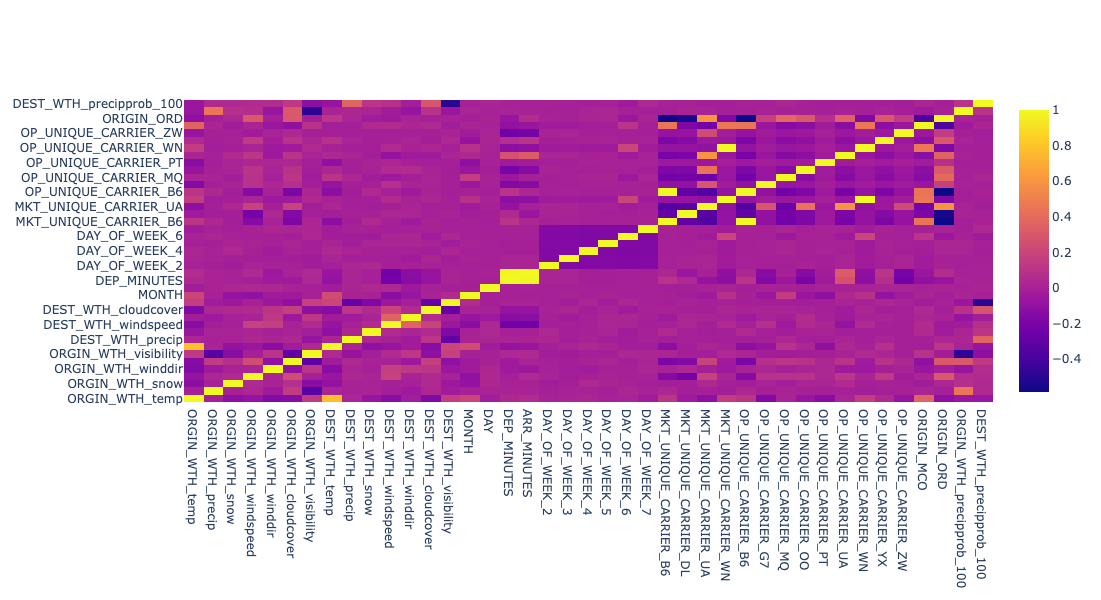

In [104]:
plot_correlation()

In [105]:
unnecessary_columns = [
    'ORGIN_WTH_temp',
    'DEST_WTH_temp',
    'ORGIN_WTH_precipprob_100',
    'DEST_WTH_precipprob_100'    
]
flight_data_encoded_wo_arr_delay.drop(columns = unnecessary_columns, inplace = True)
flight_data_encoded_wo_arr_delay.columns
prediction_data.drop(columns = unnecessary_columns, inplace = True)
prediction_data.columns

Index(['ORGIN_WTH_precip', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'DEST_WTH_precip', 'DEST_WTH_snow', 'DEST_WTH_windspeed',
       'DEST_WTH_winddir', 'DEST_WTH_cloudcover', 'DEST_WTH_visibility',
       'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ARR_DELAY_CATEGORY'],
      dtype='object')

Index(['ARR_DELAY', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_precip', 'DEST_WTH_snow',
       'DEST_WTH_windspeed', 'DEST_WTH_winddir', 'DEST_WTH_cloudcover',
       'DEST_WTH_visibility', 'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES',
       'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5',
       'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6',
       'MKT_UNIQUE_CARRIER_DL', 'MKT_UNIQUE_CARRIER_UA',
       'MKT_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7',
       'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT',
       'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX',
       'OP_UNIQUE_CARRIER_ZW', 'ORIGIN_MCO', 'ORIGIN_ORD',
       'ARR_DELAY_CATEGORY'],
      dtype='object')

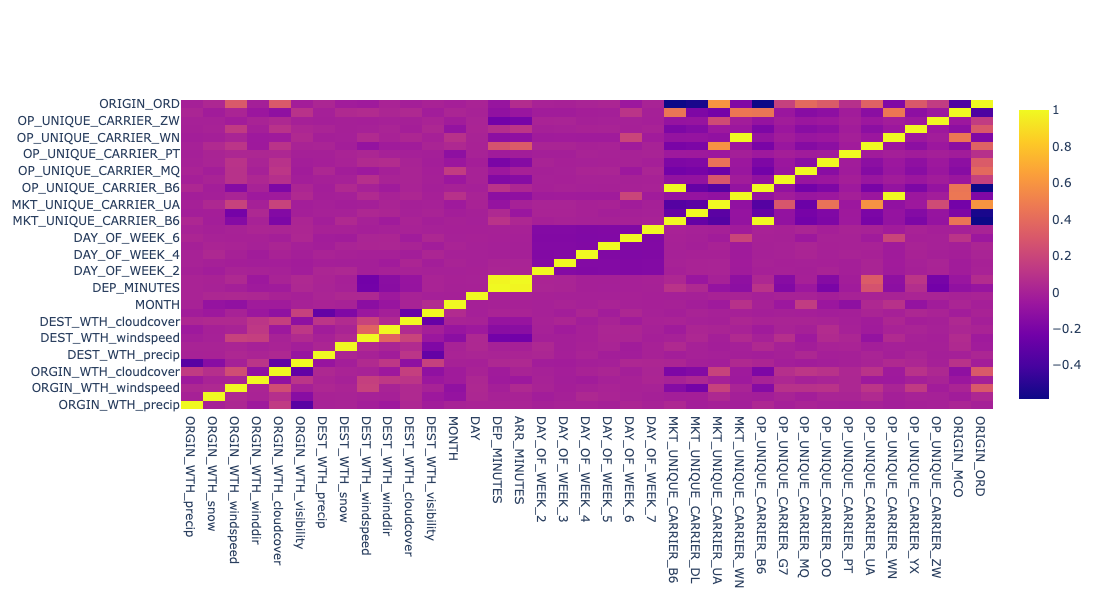

In [106]:
plot_correlation()

In [107]:
flight_data_encoded_wo_arr_delay['ARR_DELAY_CATEGORY'].value_counts()

ARR_DELAY_CATEGORY
early      3137
late       2195
on-time    1441
Name: count, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(flight_data_encoded_wo_arr_delay.drop(columns = ['ARR_DELAY_CATEGORY']), flight_data_encoded_wo_arr_delay['ARR_DELAY_CATEGORY'], stratify = flight_data_encoded_wo_arr_delay['ARR_DELAY_CATEGORY'], test_size=0.20, random_state = 50)

X_train.head()
X_test.head()
y_train.head()
y_test.head()


,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,MONTH,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD
5464,0.00,0.00,12.30,250.00,29.40,9.90,0.00,0.00,9.20,235.00,84.70,9.90,7,14,795,966,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2062,0.03,0.00,3.10,27.00,100.00,2.50,0.00,0.00,5.80,78.00,100.00,9.90,9,6,985,1079,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
749,0.00,0.00,7.20,279.00,100.00,9.90,0.00,0.00,0.20,6.00,52.70,9.90,4,4,1146,1319,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4816,0.00,0.00,10.00,302.00,96.20,3.50,0.10,0.00,4.80,2.00,99.30,3.80,6,26,1179,1348,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2515,0.00,0.00,5.80,293.00,13.40,9.90,0.00,0.00,13.70,280.00,100.00,9.80,10,7,599,674,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,MONTH,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD
6543,0.00,0.00,3.10,86.00,24.20,9.90,0.00,0.00,3.30,79.00,100.00,4.90,12,26,1170,1336,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4127,0.00,0.00,5.90,283.00,100.00,9.90,0.00,0.00,6.90,249.00,100.00,9.90,3,4,1295,1367,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
123,0.00,0.00,2.20,39.00,100.00,9.90,0.01,0.00,0.00,0.00,100.00,6.10,1,13,1075,1252,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True
1245,0.00,0.00,10.30,190.00,29.70,9.90,0.00,0.00,16.00,170.00,87.70,9.90,5,26,763,844,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
888,0.00,0.00,10.50,290.00,100.00,9.90,0.00,0.00,20.40,169.00,99.80,9.90,4,21,503,667,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


5464    early
2062    early
749     early
4816     late
2515    early
Name: ARR_DELAY_CATEGORY, dtype: object

6543    on-time
4127       late
123       early
1245       late
888       early
Name: ARR_DELAY_CATEGORY, dtype: object

Index(['ORGIN_WTH_precip', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'DEST_WTH_precip', 'DEST_WTH_snow', 'DEST_WTH_windspeed',
       'DEST_WTH_winddir', 'DEST_WTH_cloudcover', 'DEST_WTH_visibility',
       'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD'],
      dtype='object')

0.6664820967146549

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

DEP_MINUTES             0.09
ORGIN_WTH_winddir       0.09
ORGIN_WTH_windspeed     0.08
ARR_MINUTES             0.08
DEST_WTH_winddir        0.07
ORGIN_WTH_cloudcover    0.06
DEST_WTH_windspeed      0.06
DAY                     0.05
MKT_UNIQUE_CARRIER_DL   0.05
MONTH                   0.04
ORGIN_WTH_visibility    0.04
ORGIN_WTH_precip        0.03
dtype: float64

,pred_Y
6543,late
4127,late
123,late
1245,early
888,early


,pred_Y,ARR_DELAY_CATEGORY
6543,late,on-time
4127,late,late
123,late,early
1245,early,late
888,early,early


Fraction of correct classification 


0.5446494464944649

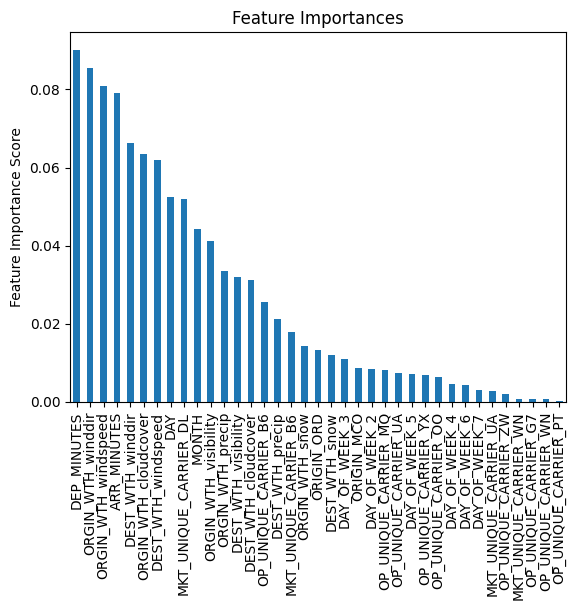

<Figure size 2000x1000 with 0 Axes>

In [109]:
X_train.columns
gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 100)

gb = gb.fit(X_train, y_train) 
gb.score(X_train, y_train) 

# gb.feature_importances_
feat_imp = pd.Series(gb.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
gb.score(X_test, y_test) 

In [110]:
X_train.columns

Index(['ORGIN_WTH_precip', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'DEST_WTH_precip', 'DEST_WTH_snow', 'DEST_WTH_windspeed',
       'DEST_WTH_winddir', 'DEST_WTH_cloudcover', 'DEST_WTH_visibility',
       'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD'],
      dtype='object')

In [111]:
prediction_data.columns

Index(['ARR_DELAY', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_precip', 'DEST_WTH_snow',
       'DEST_WTH_windspeed', 'DEST_WTH_winddir', 'DEST_WTH_cloudcover',
       'DEST_WTH_visibility', 'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES',
       'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5',
       'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6',
       'MKT_UNIQUE_CARRIER_DL', 'MKT_UNIQUE_CARRIER_UA',
       'MKT_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7',
       'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT',
       'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX',
       'OP_UNIQUE_CARRIER_ZW', 'ORIGIN_MCO', 'ORIGIN_ORD',
       'ARR_DELAY_CATEGORY'],
      dtype='object')

Index(['ORGIN_WTH_precip', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed',
       'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility',
       'DEST_WTH_precip', 'DEST_WTH_snow', 'DEST_WTH_windspeed',
       'DEST_WTH_winddir', 'DEST_WTH_cloudcover', 'DEST_WTH_visibility',
       'MONTH', 'DAY', 'DEP_MINUTES', 'ARR_MINUTES', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD'],
      dtype='object')

0.6664820967146549

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

DEP_MINUTES             0.09
ORGIN_WTH_winddir       0.09
ORGIN_WTH_windspeed     0.08
ARR_MINUTES             0.08
DEST_WTH_winddir        0.07
ORGIN_WTH_cloudcover    0.06
DEST_WTH_windspeed      0.06
DAY                     0.05
MKT_UNIQUE_CARRIER_DL   0.05
MONTH                   0.04
ORGIN_WTH_visibility    0.04
ORGIN_WTH_precip        0.03
dtype: float64

,pred_Y
0,early
1,on-time
2,late
3,early
4,late
5,early
6,early
7,late
8,late
9,early


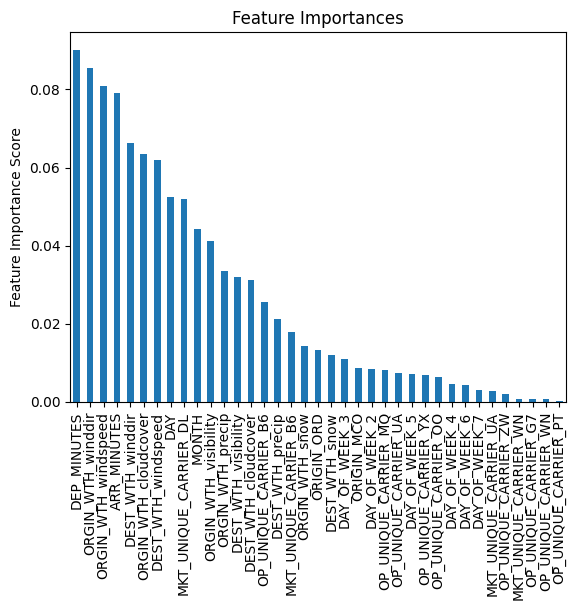

<Figure size 2000x1000 with 0 Axes>

In [112]:
X_train.columns
gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 100)

gb = gb.fit(X_train, y_train) 
gb.score(X_train, y_train) 

# gb.feature_importances_
feat_imp = pd.Series(gb.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(gb.predict(prediction_data.drop(columns=['ARR_DELAY_CATEGORY', 'ARR_DELAY'])), index = prediction_data.index, columns = ['pred_Y'])

test_output.head(25)
